# imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from MetabolomicsPaper.GeneralHelperFunctions import *

paper_dir = '/net/mraid08/export/jafar/Microbiome/Analyses/Noamba/Metabolon/Paper_v6/'
figure_dir = os.path.join(paper_dir, 'Bread')
make_dir_if_not_exists(figure_dir)
os.chdir(paper_dir)

/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load data

In [2]:
bread_df = pd.read_csv('/net/mraid08/export/jafar/Microbiome/Analyses/Noamba/microbiome_files/bread_df.csv', index_col=0, parse_dates=['StorageDT'])
bread_start = bread_df.groupby('ConnectionID').apply(lambda x: x.loc[x.StorageDT.idxmin()]).copy()
bread_end = bread_df.groupby('ConnectionID').apply(lambda x: x.loc[x.StorageDT.idxmax()]).copy()
os_1_cid = pd.read_csv('dataframes/os_1_cid.csv', index_col=0)
samps1 = pd.read_csv('dataframes/samps1.csv', index_col=0)
updated_metabs1 = pd.read_csv('dataframes/updated_metabs1.csv', index_col=0)
metabolomics = pd.read_csv('../technical_noise/dataframes/mar17_metabolomics_unnormed_fillna_min_dayfromfirstsample_regressed_rzs.csv', index_col=0)

rzs = change_index(robust_zs(os_1_cid.fillna(os_1_cid.min()).apply(np.log10)).copy(), samps1, 'SAMPLE_ID', 'CLIENT_IDENTIFIER')

In [3]:
wholemeal_bread_diff = (change_index(rzs.loc[bread_end[bread_start.W1IsReg == False].CLIENT_IDENTIFIER].copy(), bread_df, 'CLIENT_IDENTIFIER', 'ConnectionID').fillna(-3) - \
                  change_index(rzs.loc[bread_start[bread_start.W1IsReg == False].CLIENT_IDENTIFIER].copy(), bread_df, 'CLIENT_IDENTIFIER', 'ConnectionID').fillna(-3)).fillna(0).mean().loc[rzs.columns].copy().values
whitewheat_bread_diff = (change_index(rzs.loc[bread_end[bread_start.W1IsReg == True].CLIENT_IDENTIFIER].copy(), bread_df, 'CLIENT_IDENTIFIER', 'ConnectionID').fillna(-3) - \
                  change_index(rzs.loc[bread_start[bread_start.W1IsReg == True].CLIENT_IDENTIFIER].copy(), bread_df, 'CLIENT_IDENTIFIER', 'ConnectionID').fillna(-3)).fillna(0).mean().loc[rzs.columns].copy().values
n_percentiles = 20.
wholemeal_bread_diff_df = pd.DataFrame((pd.qcut(wholemeal_bread_diff, int(n_percentiles), labels=False) / n_percentiles), index=rzs.columns, columns=['Percentiles']).copy()
wholemeal_bread_diff_df['diff'] = wholemeal_bread_diff
whitewheat_bread_diff_df = pd.DataFrame((pd.qcut(whitewheat_bread_diff, int(n_percentiles), labels=False) / n_percentiles), index=rzs.columns, columns=['Percentiles']).copy()
whitewheat_bread_diff_df['diff'] = whitewheat_bread_diff

## B+D - hist+boxplots

In [104]:
wholemeal_bread_diff_df.loc['100003473']

Percentiles    0.10000
diff          -0.30833
Name: 100003473, dtype: float64

In [105]:
updated_metabs1.loc['100003473']

COMP_ID                                                           41494
                               Group   HMDB_ID                HMDB33592
                               Sample   HMDB_ID                     NaN
BIOCHEMICAL                                                      alliin
CAS                                                            556-27-4
CHEMSPIDER                                                        78760
KEGG                                                             C08265
MASS                                                            178.053
PATHWAY_SORTORDER                                                  3733
PLATFORM                                                LC/MS Pos Early
PUBCHEM                                                           87310
RI                                                                 1470
SUB_PATHWAY                                        Food Component/Plant
SUPER_PATHWAY                                               Xeno

In [63]:
updated_metabs1[updated_metabs1.BIOCHEMICAL.str.contains('choline')]

,COMP_ID,Group HMDB_ID,Sample HMDB_ID,BIOCHEMICAL,CAS,CHEMSPIDER,KEGG,MASS,PATHWAY_SORTORDER,PLATFORM,PUBCHEM,RI,SUB_PATHWAY,SUPER_PATHWAY,COMMENT
CHEMICAL_ID,,,,,,,,,,,,,,,
100009332,53261,NaN,NaN,arachidonoylcholine,NaN,NaN,NaN,390.33666,1410.0,LC/MS Pos Late,NaN,1390.0,Fatty Acid Metabolism (Acyl Choline),Lipid,arachidonoylcholine
1256,15506,HMDB00097,NaN,choline,67-48-1,149278.0,C00114,104.10699,1618.0,LC/MS Pos Early,305.0,1961.0,Phospholipid Metabolism,Lipid,choline
267,34396,HMDB01565,NaN,choline phosphate,72556-74-2,119298.0,C00588,184.07332,1619.0,LC/MS Pos Early,1014.0,700.0,Phospholipid Metabolism,Lipid,choline phosphate
100009335,53262,NaN,NaN,dihomo-linolenoyl-choline,NaN,NaN,NaN,392.35231,1406.0,LC/MS Pos Late,NaN,1424.0,Fatty Acid Metabolism (Acyl Choline),Lipid,dihomo-linolenoyl-choline
100009333,53263,NaN,NaN,docosahexaenoylcholine,NaN,NaN,NaN,414.33666,1409.0,LC/MS Pos Late,NaN,1378.0,Fatty Acid Metabolism (Acyl Choline),Lipid,docosahexaenoylcholine
100009336,53258,NaN,NaN,eicosapentaenoylcholine,NaN,NaN,NaN,388.32101,1411.0,LC/MS Pos Late,NaN,1343.0,Fatty Acid Metabolism (Acyl Choline),Lipid,eicosapentaenoylcholine
100000269,15990,HMDB00086,NaN,glycerophosphorylcholine (GPC),28319-77-9,571409.0,C00670,258.11010,1622.0,LC/MS Pos Early,71920.0,672.0,Phospholipid Metabolism,Lipid,glycerophosphorylcholine (GPC)
100015760,57463,NaN,NaN,linoleoylcholine*,NaN,NaN,NaN,366.33666,1407.0,LC/MS Pos Late,NaN,1388.0,Fatty Acid Metabolism (Acyl Choline),Lipid,linoleoylcholine*
100009331,53260,NaN,NaN,oleoylcholine,NaN,NaN,NaN,368.35231,1404.0,LC/MS Pos Late,NaN,1449.0,Fatty Acid Metabolism (Acyl Choline),Lipid,oleoylcholine


In [124]:
min_bar_value_to_label

-0.09265845949199689

In [70]:
5.83/2.51

2.3227091633466137

In [91]:
sns.set_style('noam')

ValueError: style must be one of white, dark, whitegrid, darkgrid, ticks

(1558.0, 0.163646862484361)
(536.0, 4.575013296844873e-11)
(782.0, 1.256446116955215e-07)


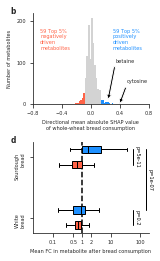

In [93]:
# a = Utils.Load('/net/mraid08/export/jafar/Microbiome/Analyses/Noamba/Metabolon/SHAP/DaysFromFirstSample/MAR17_Metabolomics_min_rzs_wholebread/abs_signed_shap.dat')
a = pd.read_csv('/net/mraid08/export/jafar/Microbiome/Analyses/Noamba/Metabolon/SHAP/DaysFromFirstSample/MAR17_Metabolomics_min_rzs_wholebread/abs_signed_shap.csv', index_col=0).loc[metabolomics.columns]
n = 59
top100_wholebread = a.iloc[:, 0].sort_values().tail(n).index
bot100_wholebread = a.iloc[:, 0].sort_values().head(n).index

sns.set_style('ticks')

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 10))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.83/2.51, 9.132/2.51))

label_fontsize = 5
tick_fontsize = 15

# fig, ax = plt.subplots(1, 1, figsize=(7,5))
color = 'lightgrey'
ax1.hist(a.iloc[:, 0], color=color, linewidth=0, bins=30)

min_bar_value_to_label = a.iloc[:, 0].quantile([0.05]).values[0]
max_bar_value_to_label = a.iloc[:, 0].quantile([0.94]).values[0]
for i, rectangle in enumerate(ax1.patches):  # iterate over every bar
    if rectangle.get_x() <= min_bar_value_to_label:
        ax1.patches[i].set_color('tomato')
    if rectangle.get_x() >= max_bar_value_to_label:
        ax1.patches[i].set_color('dodgerblue')

ax1.set_xlim((-0.8, 0.8))
sns.despine(bottom=False)
ax1.set_xticks([-0.8, -0.4, 0, 0.4, 0.8])


ax1.set_xlabel('Directional mean absolute SHAP value\nof whole-wheat bread consumption', fontsize=label_fontsize)
ax1.set_ylabel('Number of metabolites', fontsize=label_fontsize)

# ax1.set_xticklabels([-0.3, 0, 0.3], fontsize=20)
ax1.set_yticks([0, 100, 200])
# ax1.set_yticklabels([0, 50, 100], fontsize=20)
ax1.tick_params(labelsize=label_fontsize)

ax1.text(-0.7, 130, str(n) + ' Top 5%\nnegatively\ndriven\nmetabolites', color='tomato', fontsize=label_fontsize)
ax1.text(0.3, 130, str(n) + ' Top 5%\npositively\ndriven\nmetabolites', color='dodgerblue', fontsize=label_fontsize)

ax1.annotate('betaine', xy=(a.loc['799'], 10), xytext=(a.loc['799']+0.1, 100),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=2, headwidth=5, headlength=5), annotation_clip=False, fontsize=label_fontsize)
ax1.annotate('cytosine', xy=(a.loc['881'], 1), xytext=(a.loc['881']+0.1, 50),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=2, headwidth=5, headlength=5), annotation_clip=False, fontsize=label_fontsize)
# plt.savefig(draft_figures_dir + '/6B_Bread_PNP_real_correlation_hist.png')


boxprops = dict(linestyle='--', linewidth=1, color='black')
medianprops = dict(linestyle='-', linewidth=1, color='black')
whiskerprops = dict(linestyle='-', linewidth=1, color='black')
capprops = dict(linestyle='-', linewidth=1, color='black')

bplot1 = ax2.boxplot([whitewheat_bread_diff_df.loc[bot100_wholebread, 'diff'], whitewheat_bread_diff_df.loc[top100_wholebread, 'diff'], 
            wholemeal_bread_diff_df.loc[bot100_wholebread, 'diff'], wholemeal_bread_diff_df.loc[top100_wholebread, 'diff']],
          vert=False, positions=[0, 1, 4, 5], patch_artist=True, boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, showfliers=False)

colors = ['tomato', 'dodgerblue', 'tomato',  'dodgerblue']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

ax2.set_xlim((-1., 1.7))
ax2.axvline(0, color="k", linestyle='--')

# ax.set_xticks([-1, 0, 1])
# ax.set_xticklabels([0.1, 1, 10], fontsize=28)
ax2.set_xticks([np.log10(0.1), np.log10(0.5), 0, np.log10(2), 1, np.log10(100)])
ax2.set_xticklabels([0.1, 0.5, 1, 2, 10, 100], fontsize=label_fontsize)
# ax.set_xscale('log')
ax2.set_yticks([0.5, 4.5])
ax2.set_yticklabels(['White\nbread', 'Sourdough\nbread'], fontsize=label_fontsize, rotation=90)
ax2.set_xlabel('Mean FC in metabolite after bread consumption', fontsize=label_fontsize)
sns.despine(bottom=False)
ax2.set_xlim((np.log10(0.02), np.log10(200)))

print (directed_mannwhitneyu(whitewheat_bread_diff_df.loc[bot100_wholebread, 'diff'], whitewheat_bread_diff_df.loc[top100_wholebread, 'diff']))
print (directed_mannwhitneyu(wholemeal_bread_diff_df.loc[bot100_wholebread, 'diff'], wholemeal_bread_diff_df.loc[top100_wholebread, 'diff']))
print (directed_mannwhitneyu(whitewheat_bread_diff_df.loc[top100_wholebread, 'diff'], wholemeal_bread_diff_df.loc[top100_wholebread, 'diff']))

t, p = mannwhitneyu(wholemeal_bread_diff_df.loc[bot100_wholebread, 'diff'], wholemeal_bread_diff_df.loc[top100_wholebread, 'diff'])
color = 'black'
ax2.plot([1.75, 1.75], [4, 5], color=color, linestyle='-', linewidth=1)
ax2.text(x=1.8, y=4.5, s='p=%0.1g'%p, color=color, fontsize=label_fontsize, rotation=270, va='center')

t, p = mannwhitneyu(whitewheat_bread_diff_df.loc[bot100_wholebread, 'diff'], whitewheat_bread_diff_df.loc[top100_wholebread, 'diff'])
ax2.plot([1.75, 1.75], [0, 1], color=color, linestyle='-', linewidth=1)
ax2.text(x=1.8, y=0.5, s='p=%0.1g'%p, color=color, fontsize=label_fontsize, rotation=270, va='center')

t, p = mannwhitneyu(whitewheat_bread_diff_df.loc[top100_wholebread, 'diff'], wholemeal_bread_diff_df.loc[top100_wholebread, 'diff'])
ax2.plot([2.2, 2.2], [1, 5], color=color, linestyle='-', linewidth=1)
ax2.text(x=2.25, y=3, s='p=%0.1g'%p, color=color, fontsize=label_fontsize, rotation=270, va='center')

# ax2.plot([1.05, 1.05], [0, 4], color=astrix_color, linestyle='-', linewidth=3)
# ax2.text(x=1.08, y=2, s='n.s.', color=astrix_color, fontsize=20, rotation=270)
fig.tight_layout()
plt.text(-0.17, 1.02, 'b', ha='center', va='center', transform=ax1.transAxes, fontsize=label_fontsize*1.5, weight='bold')
plt.text(-0.17, 1.02, 'd', ha='center', va='center', transform=ax2.transAxes, fontsize=label_fontsize*1.5, weight='bold')

plt.savefig(os.path.join(figure_dir, 'b+d_Bread_hist+boxplots_SHAP_small.png'), dpi=200, bbox_inches='tight')
plt.savefig(os.path.join(figure_dir, 'b+d_Bread_hist+boxplots_SHAP.png'), dpi=1000, bbox_inches='tight')
plt.savefig(os.path.join(figure_dir, 'b+d_Bread_hist+boxplots_SHAP.pdf'), dpi=500, bbox_inches='tight')

In [134]:
print (directed_mannwhitneyu(whitewheat_bread_diff_df.loc[bot100_wholebread, 'diff'], whitewheat_bread_diff_df.loc[top100_wholebread, 'diff']))
print (directed_mannwhitneyu(wholemeal_bread_diff_df.loc[bot100_wholebread, 'diff'], wholemeal_bread_diff_df.loc[top100_wholebread, 'diff']))
print (directed_mannwhitneyu(whitewheat_bread_diff_df.loc[top100_wholebread, 'diff'], wholemeal_bread_diff_df.loc[top100_wholebread, 'diff']))
# print (directed_mannwhitneyu(whitewheat_bread_diff_df.loc[bot100_wholebread, 'diff'], wholemeal_bread_diff_df.loc[bot100_wholebread, 'diff']))

(1558.0, 0.163646862484361)
(536.0, 4.575013296844873e-11)
(782.0, 1.256446116955215e-07)


In [163]:
10**wholemeal_bread_diff_df.loc[top100_wholebread, 'diff'].median()
10**wholemeal_bread_diff_df.loc[bot100_wholebread, 'diff'].median()

0.6567584265509007

## E-F - swarm plots

In [1324]:
a = Utils.Load('/net/mraid08/export/jafar/Microbiome/Analyses/Noamba/Metabolon/SHAP/DaysFromFirstSample/MAR17_Metabolomics_min_rzs_wholebread/abs_signed_shap.dat')
b = Utils.Load('/net/mraid08/export/jafar/Microbiome/Analyses/Noamba/Metabolon/SHAP/DaysFromFirstSample/MAR17_Metabolomics_min_rzs_whitebread/abs_signed_shap.dat')
c = Utils.Load('/net/mraid08/export/jafar/Microbiome/Analyses/Noamba/Metabolon/SHAP/DaysFromFirstSample/MAR17_Metabolomics_min_rzs_wholewheat/abs_signed_shap.dat')
d = Utils.Load('/net/mraid08/export/jafar/Microbiome/Analyses/Noamba/Metabolon/SHAP/DaysFromFirstSample/MAR17_Metabolomics_min_rzs_whitewheat/abs_signed_shap.dat')

In [1341]:
n = 62
top100_wholewheat = a.iloc[:, 0].sort_values().tail(n).index
bot100_wholewheat = a.iloc[:, 0].sort_values().head(n).index
top100_whitewheat = a.iloc[:, 0].sort_values().tail(n).index
bot100_whitewheat = a.iloc[:, 0].sort_values().head(n).index
print (mannwhitneyu(wholemeal_bread_diff_df.loc[top100_wholewheat, 'diff'],
            wholemeal_bread_diff_df.loc[bot100_wholewheat, 'diff']))
print (mannwhitneyu(whitewheat_bread_diff_df.loc[top100_whitewheat, 'diff'],
            whitewheat_bread_diff_df.loc[bot100_whitewheat, 'diff']))

print (wholemeal_bread_diff_df.loc[top100_wholewheat, 'diff'].apply(lambda x: 10**x).median())
print (wholemeal_bread_diff_df.loc[bot100_wholewheat, 'diff'].apply(lambda x: 10**x).median())
print (whitewheat_bread_diff_df.loc[top100_whitewheat, 'diff'].apply(lambda x: 10**x).median())
print (whitewheat_bread_diff_df.loc[bot100_whitewheat, 'diff'].apply(lambda x: 10**x).median())

MannwhitneyuResult(statistic=760.0, pvalue=3.22658986640207e-09)
MannwhitneyuResult(statistic=1820.0, pvalue=0.3059935400968945)
1.4464436964342524
0.6582762587404157
0.878369671399932
0.732356917488342


In [1033]:
wholemeal_bread_diff_df.loc[top100_wholewheat, 'diff'].apply(lambda x: 10**x)

100004322     3.364294
X - 12818     5.788004
881          78.494399
X - 16964     0.670874
100020373     0.594618
Name: diff, dtype: float64

In [7]:
up_examples = ['799', '881', 'X - 24747']
down_examples = ['100001267', 'X - 12798', 'X - 24588']
# metabs1[metabs1.CHEMICAL_ID.isin(up_examples)]
updated_metabs1[updated_metabs1.index.isin(up_examples)]

,COMP_ID,Group HMDB_ID,Sample HMDB_ID,BIOCHEMICAL,CAS,CHEMSPIDER,KEGG,MASS,PATHWAY_SORTORDER,PLATFORM,PUBCHEM,RI,SUB_PATHWAY,SUPER_PATHWAY,COMMENT
CHEMICAL_ID,,,,,,,,,,,,,,,
799,3141,HMDB00043,NaN,betaine,107-43-7,2.421995e+10,C00719,118.08626,6.0,LC/MS Pos Early,247.0,1064.0,"Glycine, Serine and Threonine Metabolism",Amino Acid,betaine
881,573,HMDB00630,NaN,cytosine,71-30-7,5.770000e+02,C00380,112.05054,3346.0,LC/MS Pos Early,597.0,2060.0,"Pyrimidine Metabolism, Cytidine containing",Nucleotide,cytosine
X - 24747,53266,NaN,NaN,X - 24747,NaN,NaN,NaN,321.14689,NaN,LC/MS Neg,NaN,4360.0,NaN,NaN,X - 24747


In [8]:
wholemeal_end_minus_start = (change_index(rzs.loc[bread_end[bread_start.W1IsReg == False].CLIENT_IDENTIFIER].copy(), bread_df, 'CLIENT_IDENTIFIER', 'ConnectionID') - \
                             change_index(rzs.loc[bread_start[bread_start.W1IsReg == False].CLIENT_IDENTIFIER].copy(), bread_df, 'CLIENT_IDENTIFIER', 'ConnectionID')).apply(lambda x: 10**x).apply(np.log2)
wholemeal_end_minus_start['kind'] = 'wholemeal'
whitewheat_end_minus_start = (change_index(rzs.loc[bread_end[bread_start.W1IsReg == True].CLIENT_IDENTIFIER].copy(), bread_df, 'CLIENT_IDENTIFIER', 'ConnectionID') - \
                             change_index(rzs.loc[bread_start[bread_start.W1IsReg == True].CLIENT_IDENTIFIER].copy(), bread_df, 'CLIENT_IDENTIFIER', 'ConnectionID')).apply(lambda x: 10**x).apply(np.log2)
whitewheat_end_minus_start['kind'] = 'whitewheat'
end_minus_start = pd.concat((wholemeal_end_minus_start, whitewheat_end_minus_start))

In [10]:
end_minus_start[['881', 'kind']]

,881,kind
ConnectionID,,
1320,8.752499,wholemeal
1322,5.971942,wholemeal
1323,1.374163,wholemeal
1324,8.005981,wholemeal
1326,2.746963,wholemeal
1327,8.224411,wholemeal
1331,6.483638,wholemeal
1334,1.305049,wholemeal
1335,10.283776,wholemeal


In [13]:
c='881'
mannwhitneyu(end_minus_start[end_minus_start['kind']=='wholemeal'][c], end_minus_start[end_minus_start['kind']=='whitewheat'][c])
c='799'
mannwhitneyu(end_minus_start[end_minus_start['kind']=='wholemeal'][c], end_minus_start[end_minus_start['kind']=='whitewheat'][c])

MannwhitneyuResult(statistic=14.0, pvalue=0.00364227850473983)

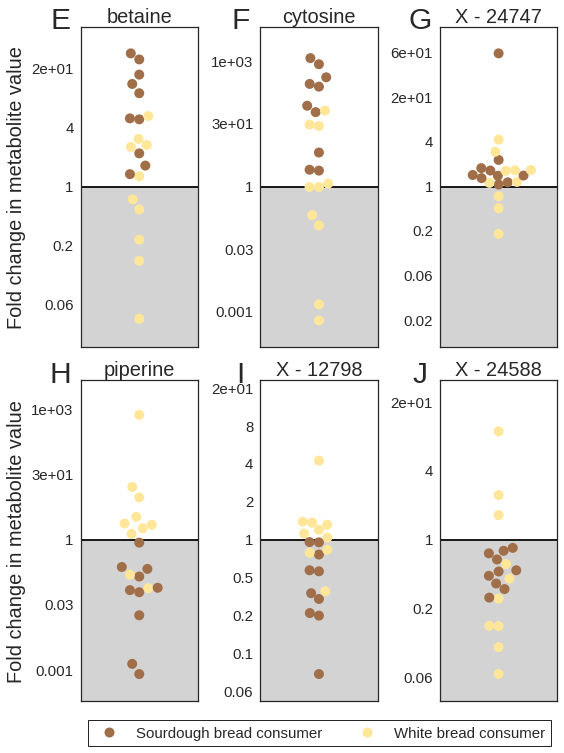

In [657]:
sns.set_style('white')

fig, axes = plt.subplots(2, 3, figsize=(8, 10))
up_pl_down = up_examples + down_examples
for i,ax,letter in zip(range(6), axes.flatten(), ['E', 'F', 'G', 'H', 'I', 'J']):
    ax.axhline(y=0, color='black')
    sns.swarmplot(y=up_pl_down[i], x=[0]*20, hue='kind', data=end_minus_start, ax=ax, palette={'whitewheat':'#FFE699', 'wholemeal':'#A06F4A'}, s=10)
    ax.legend('')
#     sns.swarmplot([0]*10, whitewheat_end_minus_start[up_pl_down[i]], ax=ax, color='blue', s=10)
    max_val = end_minus_start[up_pl_down[i]].apply(abs).max()
    ax.set_ylim((-max_val*1.2, max_val*1.2))
    ax.set_yticklabels(['%0.1g'%(2**y) for y in ax.get_yticks()])
    ax.set_title(metabs1[metabs1.CHEMICAL_ID == up_pl_down[i]].BIOCHEMICAL.values[0], fontsize=20)
    if i%3 == 0:
        ax.set_ylabel('Fold change in metabolite value', fontsize=20)
    else:
        ax.set_ylabel('')
    ax.fill_between([-1, 1], [-100, 0], color='lightgrey')
    ax.set_xticklabels([''])
    ax.tick_params(labelsize=15)
    plt.text(-0.17, 1.02, letter, ha='center', va='center', transform=ax.transAxes, fontsize=30)
    
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colour, markersize=10, lw=4, label=label) for (label, colour) in {'White bread consumer':'#FFE699', 'Sourdough bread consumer':'#A06F4A'}.items()]
leg = axes[1, 0].legend(handles=legend_elements, loc='center left', bbox_to_anchor=(0, -0.1), ncol=2, fontsize=15, frameon=True)
# leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1)
# leg.get_frame().set_facecolor('black')
# axes[1, 0].legend()
# ax.axis('off')


plt.savefig(draft_figures_dir + '/6E-J_Bread_hist+boxplots.png', dpi=200, bbox_inches='tight')

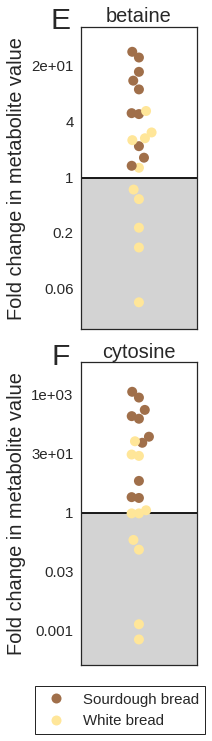

In [658]:
sns.set_style('white')

fig, axes = plt.subplots(2, 1, figsize=(3, 9.5))
up_pl_down = up_examples + down_examples
for i,ax,letter in zip(range(2), axes.flatten(), ['E', 'F']):
    ax.axhline(y=0, color='black')
    sns.swarmplot(y=up_pl_down[i], x=[0]*20, hue='kind', data=end_minus_start, ax=ax, palette={'whitewheat':'#FFE699', 'wholemeal':'#A06F4A'}, s=10)
    ax.legend('')
#     sns.swarmplot([0]*10, whitewheat_end_minus_start[up_pl_down[i]], ax=ax, color='blue', s=10)
    max_val = end_minus_start[up_pl_down[i]].apply(abs).max()
    ax.set_ylim((-max_val*1.2, max_val*1.2))
    ax.set_yticklabels(['%0.1g'%(2**y) for y in ax.get_yticks()])
    ax.set_title(metabs1[metabs1.CHEMICAL_ID == up_pl_down[i]].BIOCHEMICAL.values[0], fontsize=20)
    ax.set_ylabel('Fold change in metabolite value', fontsize=20)
    ax.fill_between([-1, 1], [-100, 0], color='lightgrey')
    ax.set_xticklabels([''])
    ax.tick_params(labelsize=15)
    plt.text(-0.17, 1.02, letter, ha='center', va='center', transform=ax.transAxes, fontsize=30)
    
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colour, markersize=10, lw=4, label=label) for (label, colour) in {'White bread':'#FFE699', 'Sourdough bread':'#A06F4A'}.items()]
leg = axes[1].legend(handles=legend_elements, loc='center left', bbox_to_anchor=(-0.457, -0.15), ncol=1, fontsize=15, frameon=True)
# leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1)
# leg.get_frame().set_facecolor('black')
# axes[1, 0].legend()
# ax.axis('off')


plt.savefig(draft_figures_dir + '/6E-F_Bread_hist+boxplots.png', dpi=500, bbox_inches='tight')

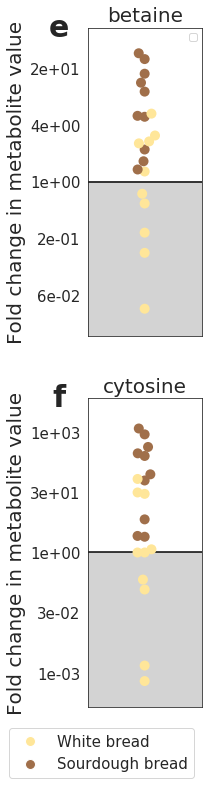

In [68]:
sns.set_style('white')
from matplotlib.lines import Line2D

fig, axes = plt.subplots(2, 1, figsize=(3, 11))
up_pl_down = up_examples + down_examples
for i, ax, letter in zip(range(2), axes.flatten(), ['E', 'F']):
    ax.axhline(y=0, color='black')
    sns.swarmplot(y=up_pl_down[i], x=[0]*20, hue='kind', data=end_minus_start, ax=ax, palette={'whitewheat':'#FFE699', 'wholemeal':'#A06F4A'}, s=10)
    ax.legend('')
#     sns.swarmplot([0]*10, whitewheat_end_minus_start[up_pl_down[i]], ax=ax, color='blue', s=10)
    max_val = end_minus_start[up_pl_down[i]].apply(abs).max()
    ax.set_ylim((-max_val*1.2, max_val*1.2))
    ax.set_yticklabels(['%1.e'%(2**y) for y in ax.get_yticks()])
    ax.set_title(updated_metabs1[updated_metabs1.index == up_pl_down[i]].BIOCHEMICAL.values[0], fontsize=20)
    ax.set_ylabel('Fold change in metabolite value', fontsize=20)
    ax.fill_between([-1, 1], [-100, 0], color='lightgrey')
    ax.set_xticklabels([''])
    ax.tick_params(labelsize=15)
#     ax.set_yticklabels(['%0.1g'%g for g in ax.get_yticks()])
#     plt.text(-0.17, 1.02, letter, ha='center', va='center', transform=ax.transAxes, fontsize=30)
    
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colour, markersize=10, lw=4, label=label) for (label, colour) in {'White bread':'#FFE699', 'Sourdough bread':'#A06F4A'}.items()]
leg = axes[1].legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1., -0.15), ncol=1, fontsize=15, frameon=True)
# leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1)
# leg.get_frame().set_facecolor('black')
# axes[1, 0].legend()
# ax.axis('off')

fig.tight_layout()

plt.text(-0.25, 1., 'e', ha='center', va='center', transform=axes[0].transAxes, fontsize=30, weight='bold')
plt.text(-0.25, 1., 'f', ha='center', va='center', transform=axes[1].transAxes, fontsize=30, weight='bold')

plt.savefig(figure_dir + '/e-f_Bread_hist+boxplots.png', dpi=500, bbox_inches='tight')
plt.savefig(figure_dir + '/e-f_Bread_hist+boxplots.pdf', dpi=500, bbox_inches='tight')